Value iteration started...


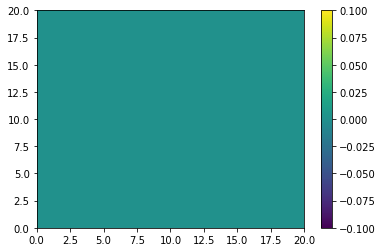

Iteration 0 ended


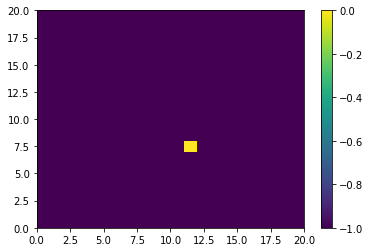

Iteration 1 ended


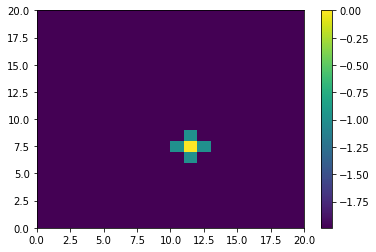

Iteration 2 ended


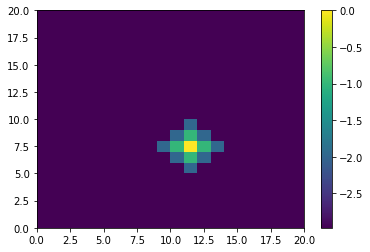

Iteration 3 ended


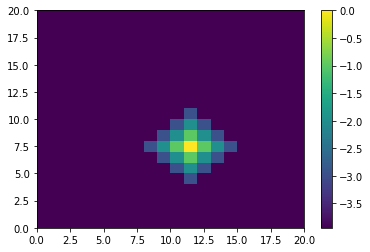

Iteration 4 ended


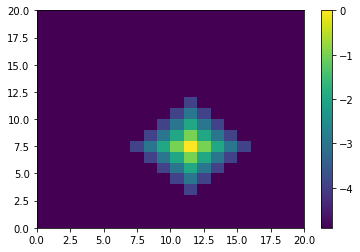

Iteration 5 ended


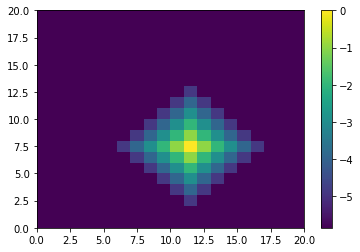

Iteration 6 ended


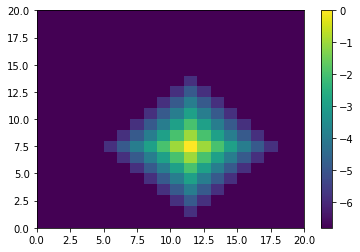

Iteration 7 ended


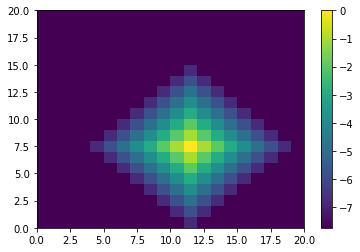

Iteration 8 ended


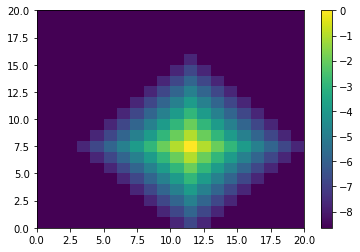

Iteration 9 ended


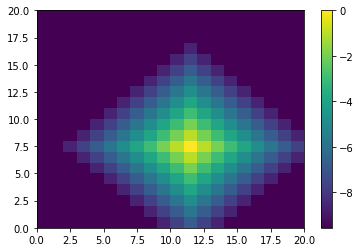

Iteration 10 ended


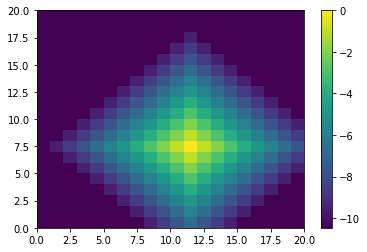

Iteration 11 ended


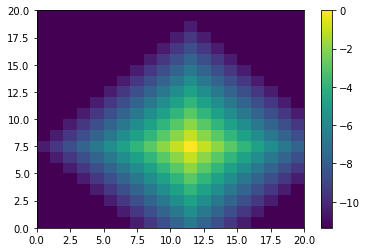

Iteration 12 ended


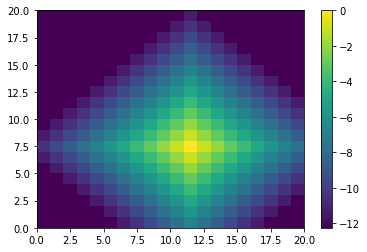

Iteration 13 ended


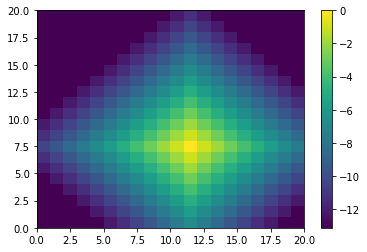

Iteration 14 ended


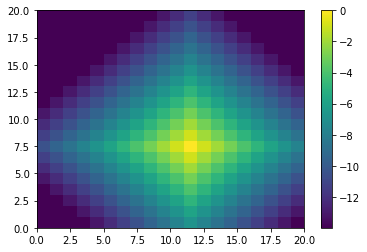

Iteration 15 ended


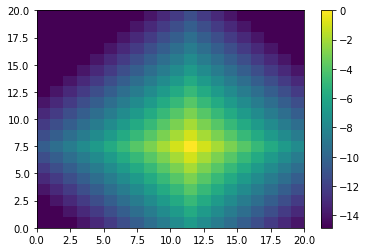

Iteration 16 ended


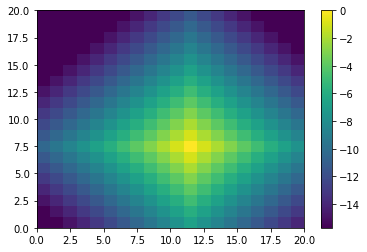

Iteration 17 ended


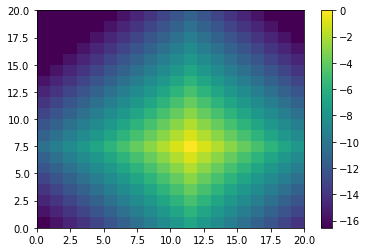

Iteration 18 ended


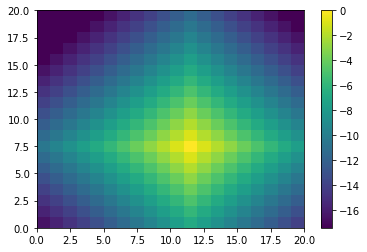

Iteration 19 ended


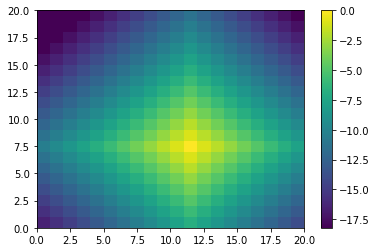

Iteration 20 ended


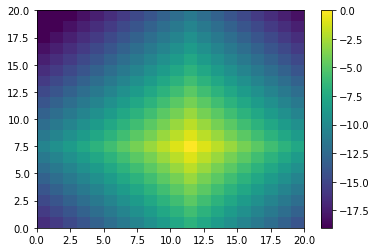

Iteration 21 ended


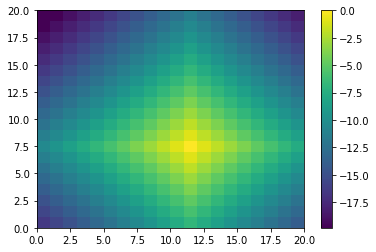

Iteration 22 ended


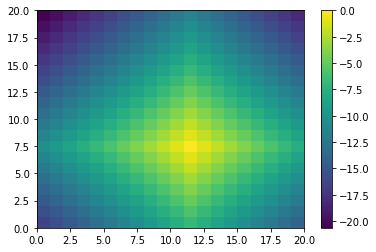

Iteration 23 ended


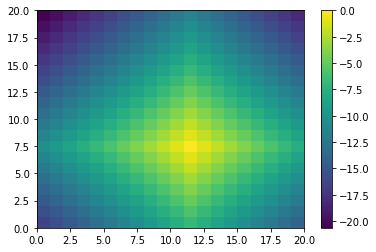

Value iteration finished!


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from myelin.dp import ValueIteration, ValueIterationCallback
from myelin.mdps import GridWorld


def display_value_function(vf):
    np.set_printoptions(precision=4, linewidth=200)
    plt.pcolormesh(vf)
    plt.colorbar()
    plt.show()


class Monitor(ValueIterationCallback):

    def on_learning_begin(self, data):
        print('Value iteration started...')
        display_value_function(data['vf'])

    def on_learning_end(self, data):
        print('Value iteration finished!')

    def on_iteration_end(self, data):
        print('Iteration %d ended' % data['n_iter'])
        display_value_function(data['vf'])


ROWS, COLS = 20, 20
value_iteration = ValueIteration(
    mdp=GridWorld(ROWS, COLS),
    theta=0.001,
    gamma=0.99,
    vfunction=np.zeros((ROWS, COLS)),
    callbacks=[Monitor()]
)
value_iteration.learn()